In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../exercicio3/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
height_in_meters = df['height'] / 100
height_square = height_in_meters ** 2
bmi = df['weight'] / height_square
df['overweight'] = np.where(bmi > 25, 1, 0)
df['overweight'].head()

0    0
1    1
2    0
3    1
4    0
Name: overweight, dtype: int64

In [5]:
# Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


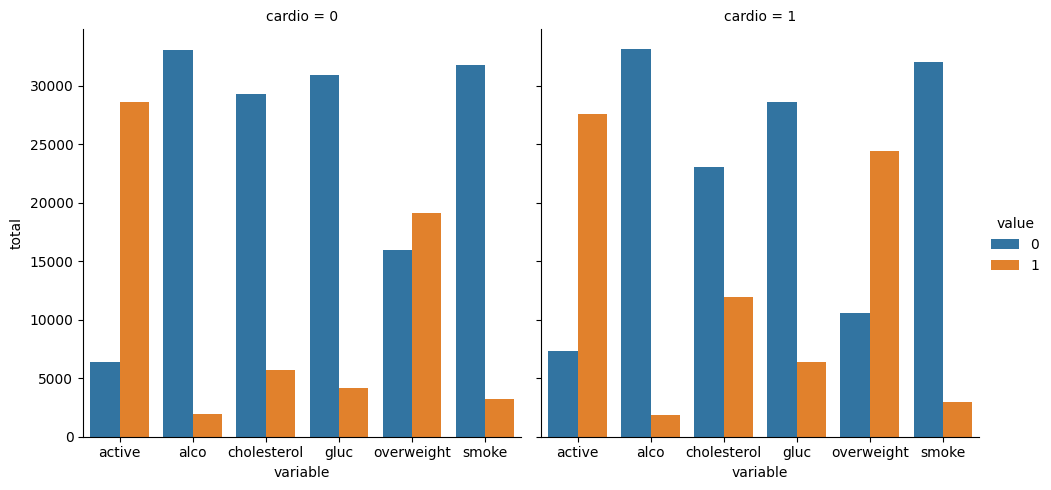

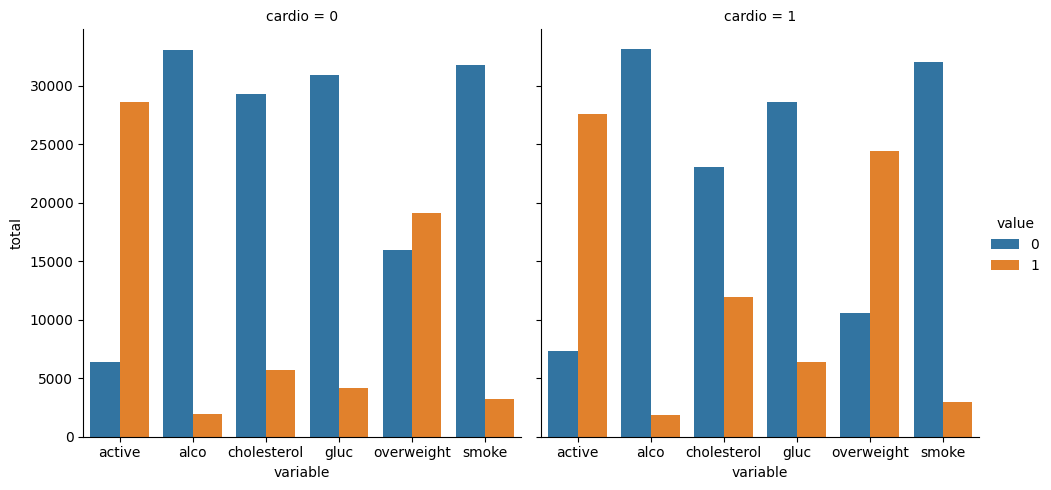

In [10]:
# Draw the Categorical Plot in the draw_cat_plot function.
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']],
                    id_vars=['cardio'], var_name='variable', value_name='value')

    # 6
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # 7
    catplot = sns.catplot(data=df_cat, x='variable', hue='value', kind='count', col='cardio')

    # 8
    catplot.set_axis_labels('variable', 'total')

    # 9
    catplot.fig.savefig('catplot.png')
    return catplot.fig

draw_cat_plot()

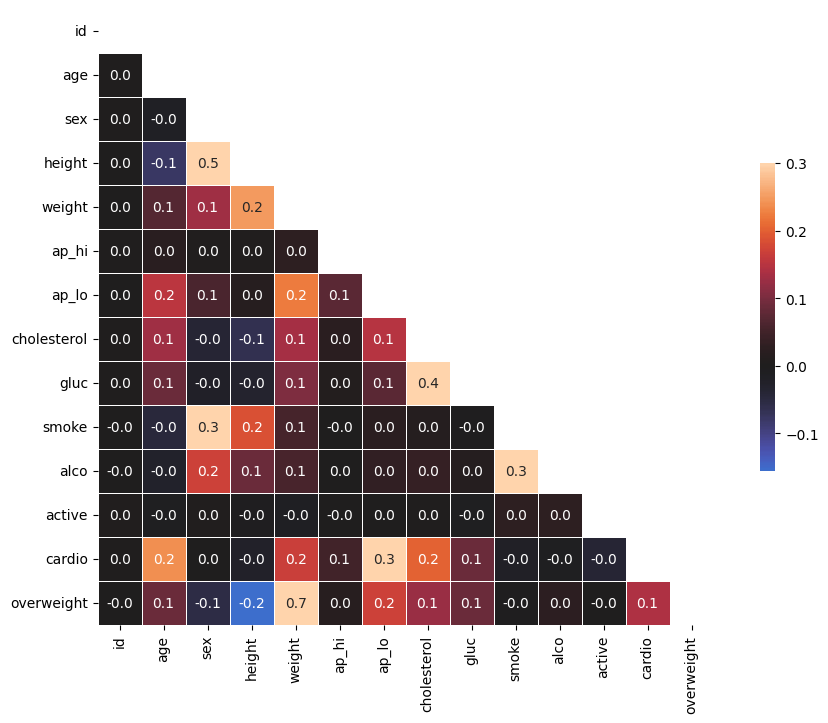

In [7]:
def draw_heat_map():
    # 11 - Limpeza dos dados
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])]  # Filtra dados com pressão diastólica maior que a sistólica
    df_heat = df_heat[(df_heat['height'] >= df_heat['height'].quantile(0.025)) & (df_heat['height'] <= df_heat['height'].quantile(0.975))]  # Filtra altura fora do intervalo
    df_heat = df_heat[(df_heat['weight'] >= df_heat['weight'].quantile(0.025)) & (df_heat['weight'] <= df_heat['weight'].quantile(0.975))]  # Filtra peso fora do intervalo

    # 12 - Calcula a matriz de correlação
    corr = df_heat.corr()

    # 13 - Cria uma máscara para a parte superior da matriz
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14 - Configura o gráfico
    fig, ax = plt.subplots(figsize=(12, 8))

    # 15 - Plota o gráfico de calor
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f",center=0, vmax=0.3, ax=ax, square=True,
                linewidths=0.5, cbar_kws={"shrink": .5})

    # 16 - Salva a imagem do gráfico
    fig.savefig('heatmap.png')

    plt.close(fig)

    return fig

draw_heat_map()